# Titanic Dataset Visualizations

This file serves as a test site for  visualizations, realized for the dashboard using Streamlit. First all the necessary libraries and the dataset is loaded.

Following datasets from Kaggle are used:

- Titanic extended Dataset: https://www.kaggle.com/datasets/pavlofesenko/titanic-extended
- Complete Titanic Dataset from Kaggle:https://www.kaggle.com/datasets/vinicius150987/titanic3

The second dataset was used to get all the information about the survivors, as the first one was split in a training and test dataset, where the test data set had no ground truth regarding if the passenger survived. First the datasets are examined and joined togehter. Afterwards some visualizations are done.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# First dataset
df = pd.read_csv('data/full.csv')
df.shape

(1309, 21)

In [3]:
# Second dataset
df2 = pd.read_excel('data/titanic3.xls')
df2.shape

(1309, 14)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df2 = df2[['name', 'survived']]

In [7]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
dtype: object

In [8]:
df2.dtypes

name        object
survived     int64
dtype: object

In [9]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [10]:
df2['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [11]:
df = df.join(df2.set_index("name"), on='Name')
df.shape

(1313, 22)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14,NaN,3.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,0.0


In [12]:
# Check if both datasets have the same variable in their survived column to see if the join was successfull
# Only one entry is different
df3=df.dropna(subset=['Survived'])
df3['new'] = np.where(df3['Survived'] == df3['survived'],"GOOD", "BAD")
df3['new'].value_counts()

<ipython-input-12-884947158cd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['new'] = np.where(df3['Survived'] == df3['survived'],"GOOD", "BAD")


GOOD    892
BAD       1
Name: new, dtype: int64

In [44]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
survived       float64
dtype: object

In [45]:
df.shape

(1313, 22)

In [50]:
df=df.dropna(subset=['survived'])

In [51]:
df.shape

(1291, 22)

In [53]:
df['survived'] = df['survived'].astype(int)

In [54]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
survived         int64
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Density'>

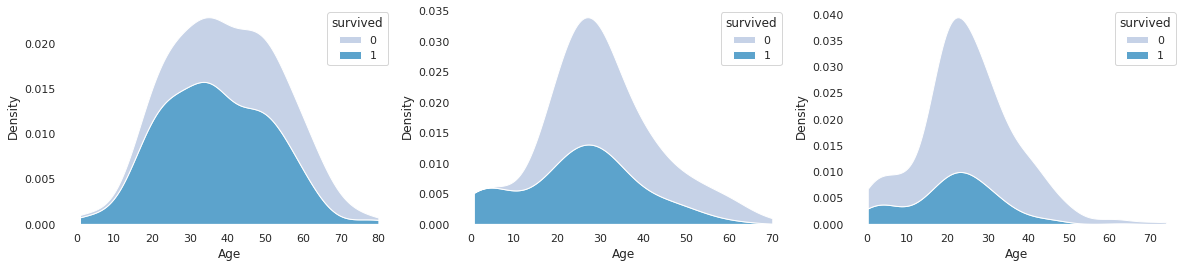

In [56]:
# A density plot for the 3 different passenger classes
# Stacked and colored wether they survived or not
sns.set(rc={'axes.facecolor':'none', 'figure.facecolor':'none'})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
sns.kdeplot(
    data=df.loc[df['Pclass'] == 1], x = 'Age', cut=0, fill=True, hue="survived", ax = ax1, multiple = 'stack', palette='PuBu'
)
sns.kdeplot(
    data=df.loc[df['Pclass'] == 2], x = 'Age', cut=0, fill=True, hue="survived", ax = ax2, multiple = 'stack', palette='PuBu'
)
sns.kdeplot(
    data=df.loc[df['Pclass'] == 3], x = 'Age', cut=0, fill=True, hue="survived", ax = ax3, multiple = "stack", palette='PuBu'
)

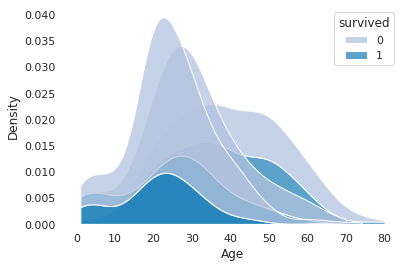

In [133]:
# Testing other configurations of the debnsity plot, as the first one wasn't displayed porperly
fig_kde1 = sns.kdeplot(
    data=df[df['Pclass'] == 1],
    x='Age', cut=0, fill=True, hue="survived", multiple='stack', palette='PuBu'
)
fig_kde2 = sns.kdeplot(
    data=df[df['Pclass'] == 2],
    x='Age', cut=0, fill=True, hue="survived", multiple='stack', palette='PuBu'
)
fig_kde3 = sns.kdeplot(
    data=df[df['Pclass'] == 3],
    x='Age', cut=0, fill=True, hue="survived", multiple="stack", palette='PuBu'
)

In [57]:
# First try of a bar chart for the lifeboats
# The values are sorted according to the launch order
lifeboat = df.groupby('Lifeboat')['Sex'].value_counts().unstack().reset_index().fillna(0)
order = ['7', '5', '3', '8', '1', '6', '16', '14', '12', '9',
         '11', '13', '15', '2', '10', '4', 'C', 'D', 'B', 'A']
lifeboat = lifeboat.set_index('Lifeboat').reindex(order).reset_index()
sum_column = lifeboat["female"] + lifeboat["male"]
lifeboat["count"] = sum_column

In [58]:
# Figure is displayed but throws error if no female/male passengers are in the dataset
fig = px.bar(lifeboat, x="Lifeboat", y=["female", "male"], title="Lifeboats in launch order")
fig.update_layout(
    legend_title="Gender",
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
# NOTE: Figure show doesn't work for me, it isn't displayed
# Storing it temprorarily as html to view it
fig.write_html("file.html")

In [60]:
# Changed grouping and dataframe, values are sorted again
lifeboat=df.groupby(by=["Lifeboat",'Sex']).size().reset_index(name='Count')
order = ['7', '5', '3', '8', '1', '6', '16', '14', '12', '9',
         '11', '13', '15', '2', '10', '4', 'C', 'D', 'B', 'A']
lifeboat = lifeboat.reindex(lifeboat['Lifeboat'].map(dict(zip(order, range(len(order))))).sort_values().index)

In [63]:
# Second visualization throws no more errors
fig = px.bar(lifeboat, x="Lifeboat", y='Count', color='Sex', title="Lifeboats in launch order")
fig.update_layout(
    legend_title="Gender",
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.write_html("file.html")

In [60]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
survived         int64
dtype: object

In [61]:
# Dropping unneccesary columns
full_clean = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Hometown', 'Boarded', 'Lifeboat', 'survived']]

In [62]:
# Saving dataframe
full_clean.to_csv(r'data/full_clean.csv')

In [14]:
# Names of countries and hometowns were cleaned using openrefine
df = pd.read_csv('data/full_clean2.csv')
df=df.drop('Column',axis=1)
df.shape

(1284, 9)

In [15]:
df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Country      object
Boarded      object
Lifeboat     object
survived      int64
dtype: object

In [16]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Country,Boarded,Lifeboat,survived
0,3,male,22.0,1,0,United Kingdom,Southampton,NaN,0
1,1,female,38.0,1,0,United States of America,Cherbourg,4,1
2,3,female,26.0,0,0,Finland,Southampton,14,1
3,1,female,35.0,1,0,United States of America,Southampton,D,1
4,3,male,35.0,0,0,United Kingdom,Southampton,NaN,0


In [135]:
# Grouping df for a choropleth map
choromap = df.groupby('Country').agg(Survived=('survived', 'sum'), Passengers=('survived', 'count')).reset_index()

In [138]:
# Choropleth map to show the sum of passengers and survivors
fig = px.choropleth(choromap, locations="Country",
                    hover_data=['Survived', 'Passengers'], 
                    locationmode= 'country names',
                    scope ='world')
#fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.update_geos(oceancolor='green')
fig.write_html("file.html")